## RiMEA: Test 13

Fundamental on stairs

### References

- **Data:**  
  C. A. S. Pouw, A. Corbetta, A. Gabbana, C. van der Laan, and F. Toschi, “High-statistics pedes-trian dynamics on stairways and their probabilistic fundamental diagrams,” Transportation Research Part C: Emerging Technologies, vol. 159, p. 104468, Feb. 2024, doi: 10.1016/j.trc.2023.104468.
  [arxiv](https://doi.org/10.48550/arXiv.2307.15609).

- S. Burghardt, A. Seyfried, and W. Klingsch, “Fundamental Diagram of Stairs: Critical Review and Topographical Measurements,” in Pedestrian and Evacuation Dynamics 2012, U. Weidmann, U. Kirsch, and M. Schreckenberg, Eds., Cham: Springer International Publishing, 2014, pp. 329–344. doi: 10/gpwb7b.


>> pedestrian_dynamics_fd.png


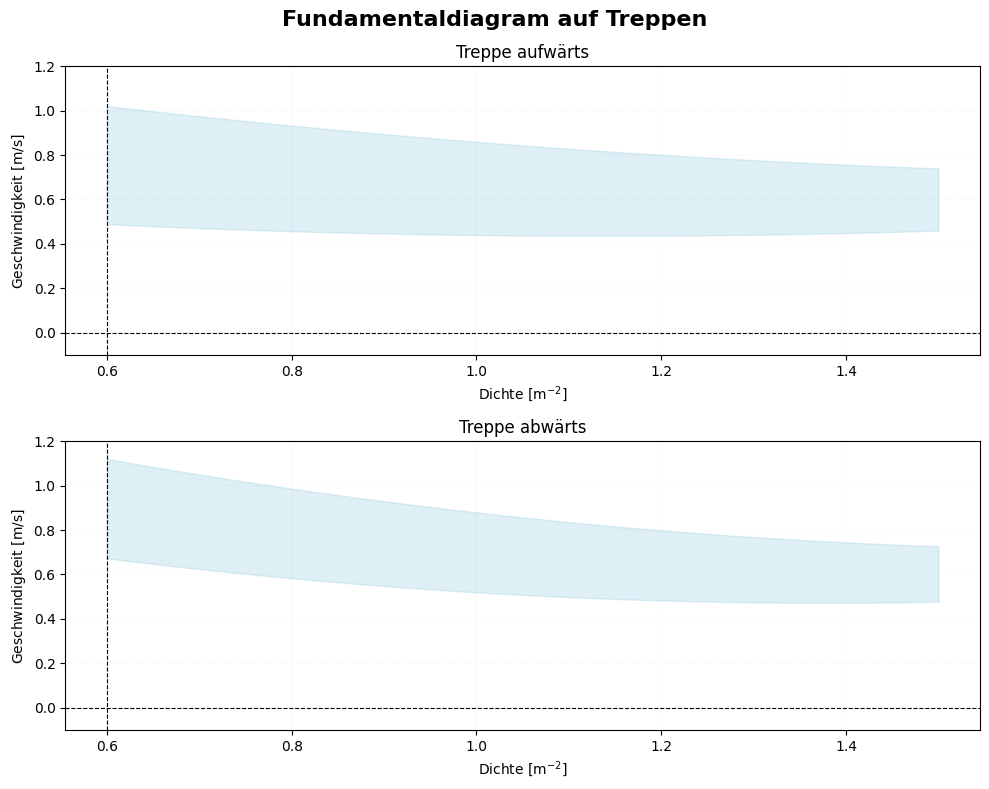

In [ ]:
"""FD according to
High-statistics pedestrian dynamics on stairways and their probabilistic fundamental diagrams
10.1016/j.trc.2023.104468
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def plot_fundamental_diagram(save_path=None):
    """Create a comprehensive visualization of pedestrian dynamics on stairs."""

    rho = np.linspace(0.6, 1.5, 500)  # density values

    # Upward movement
    mean_speed_up = 0.18 * rho**2 - 0.55 * rho + 1.02
    std_speed_up = np.maximum(-0.14 * rho + 0.35, 0)

    # Downward movement
    mean_speed_down = 0.33 * rho**2 - 1.02 * rho + 1.39
    std_speed_down = np.maximum(-0.11 * rho + 0.29, 0)  # Ensure non-negative std dev

    y_max = (
        max(
            np.max(mean_speed_up + std_speed_up),
            np.max(mean_speed_down + std_speed_down),
        )
        + 0.1
    )

    fig, (up, down) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    fig.suptitle(
        "Fundamentaldiagram auf Treppen",
        fontsize=16,
        fontweight="bold",
    )

    def plot_direction(
        ax, rho, mean_speed, std_speed, direction, plot_main_curve=False
    ):
        # Main speed curve
        if plot_main_curve:
            ax.plot(
                rho,
                mean_speed,
                label=f"Mittlere Geschwindigkeit",
                color="blue",
                linewidth=2,
            )

        # Uncertainty band with more nuanced visualization
        ax.fill_between(
            rho,
            mean_speed - std_speed,
            mean_speed + std_speed,
            color="lightblue",
            alpha=0.4,
            label="",
        )

        ax.grid(True, linestyle="--", linewidth=0.2, color="gray", alpha=0.2)
        ax.axhline(0, color="black", linestyle="--", linewidth=0.8)
        ax.axvline(0.6, color="black", linestyle="--", linewidth=0.8)

        ax.set_xlabel(r"Dichte $[\mathrm{m}^{-2}]$", fontsize=10)
        ax.set_ylabel(r"Geschwindigkeit $[\mathrm{m/s}]$", fontsize=10)
        ax.set_title(f"{direction}", fontsize=12)
        ax.set_ylim(-0.1, round(y_max, 1))
        if plot_main_curve:
            ax.legend(loc="best", framealpha=0.5)

        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))

    plot_direction(up, rho, mean_speed_up, std_speed_up, "Treppe aufwärts")
    plot_direction(down, rho, mean_speed_down, std_speed_down, "Treppe abwärts")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    return fig


fig = plot_fundamental_diagram("pedestrian_dynamics_fd.png")
print(">> pedestrian_dynamics_fd.png")